In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from yellowbrick.regressor import PredictionError, ManualAlphaSelection
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.model_selection import FeatureImportances

In [25]:
df = pd.read_csv("Advertising.csv")

In [26]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [28]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

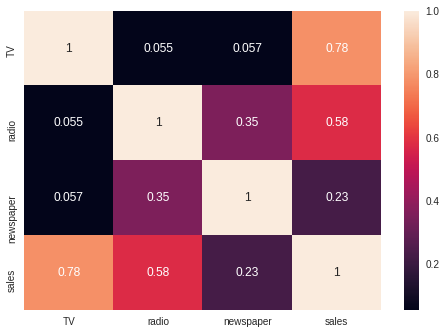

In [29]:
sns.heatmap(df.corr(), annot=True)

In [30]:
X = df.drop(["sales"], axis=1)

In [31]:
y = df.sales

In [32]:
scaler = StandardScaler()

In [33]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n", "mae:", mae, "\n", "mse:", mse, "\n", "rmse:", rmse)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
scaler.fit(X_train)

StandardScaler()

In [36]:
X_train = scaler.transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

In [38]:
lasso_model = Lasso()

In [39]:
lasso_model.fit(X_train, y_train)

Lasso()

In [40]:
y_pred = lasso_model.predict(X_test)

In [41]:
eval_metrics(y_test, y_pred)

r2_score: 0.7900277437769083 
 mae: 1.6452603285991416 
 mse: 6.60771010627317 
 rmse: 2.570546655144226


In [42]:
accuracies = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)

In [43]:
accuracies.mean()

0.8155099608241121

In [44]:
alpha_space = np.linspace(0.1, 20, 100)

In [45]:
lasso_cv_model = LassoCV(alphas=alpha_space, cv=10).fit(X_train, y_train)